In [1]:
from IPython.core.display import HTML
css = open('style_table.css').read()
HTML('<style>{}</style>'.format(css))

# Statsmodels

In [2]:
import statsmodels.api as sm

_ = sm.datasets.get_rdataset("Guerry", "HistData", cache=".cache")
_ = sm.datasets.get_rdataset("Duncan", "car", cache=".cache")
_ = sm.datasets.get_rdataset("Arthritis", "vcd", cache=".cache")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import seaborn as sns
sns.set(color_codes=True)

In [4]:
%matplotlib inline

In [5]:
pd.set_option('mode.chained_assignment', None)

First we will load up a historical dataset on French Departments.

In [6]:
dta = sm.datasets.get_rdataset("Guerry", "HistData", cache=".cache")                               

In [7]:
dta.data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


We want to get the log of the population, so we create a new column in the data.

In [8]:
df = dta.data

In [9]:
df['log_pop1831'] = df['Pop1831'].apply(np.log)

We specify the model using an R-like notation.
This is provided by the `patsy` package.

The model specification actually generates two **design matricies** that will go into the model.

The model is a python object, and calling it's `fit()` method returns a results object.

In [10]:
ols_model = sm.formula.ols("Lottery ~ Literacy + log_pop1831",
                           data=df)

In [11]:
results = ols_model.fit()

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 05 Apr 2016   Prob (F-statistic):           1.90e-08
Time:                        10:19:40   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     246.4341     35.233      6.995      0.000       176.358   316.510
Literacy       -0.4889      0.128     -3.832      0.000        -0.743    -0.235
log_pop1831   -31.3114      5.977     -5.239      0.000       -43.199   -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You can get parts of the results by getting various properties of the results object.
The following return Pandas Series objects.

In [13]:
results.params

Intercept      246.434135
Literacy        -0.488923
log_pop1831    -31.311392
dtype: float64

In [14]:
results.tvalues

Intercept      6.994511
Literacy      -3.832038
log_pop1831   -5.238842
dtype: float64

In [15]:
results.pvalues

Intercept      6.260771e-10
Literacy       2.462102e-04
log_pop1831    1.202925e-06
dtype: float64

In [16]:
results.pvalues < .05

Intercept      True
Literacy       True
log_pop1831    True
dtype: bool

In [17]:
type(results.params)

pandas.core.series.Series

In [18]:
Y, X = patsy.dmatrices("Lottery ~ Literacy + log_pop1831", df,
                       return_type='dataframe')
results.predict(X)

array([ 45.28111552,  26.10731517,  61.66689491,  65.84571262,
        60.50666251,  50.65364442,  36.18545491,  64.36053682,
        45.16226913,  54.50128015,  47.05726094,  43.59906372,
        26.75575698,  57.33509109,  44.31149942,  36.4093396 ,
        66.44356669,  62.5179869 ,  31.445032  ,  38.37361199,
        60.4349197 ,  44.14479871,  35.96987559,  47.35193753,
        32.05500621,  43.73139604,  43.02036876,  42.80379617,
        41.5681693 ,  48.01756606,  29.0649797 ,  41.34530592,
        36.80711795,  65.8333425 ,  54.95241358,  34.66823101,
        30.8711604 ,  56.14387953,  62.18620796,  45.34919918,
        58.41110071,  42.04335068,  46.75969329,  57.84147286,
        48.13693343,  78.42531729,  42.68049242,  25.57205184,
        33.38962699,  38.36831808,  53.49369591,  24.39057162,
        30.17352354,  49.46837681,  29.66117011,  59.94201695,
         8.45773319,  32.60937127,  33.71368948,  19.4234143 ,
        38.28350577,  33.70590127,  49.83755855,  72.94

In [19]:
from mpl_toolkits.mplot3d import Axes3D

def axis_plot(df):
    ## Create the 3d plot -- skip reading this
    # Literacy and Population grid for 3d plot
    literacy_min = df.Literacy.min()
    literacy_max = df.Literacy.max()
    pop_min = df.log_pop1831.min()
    pop_max = df.log_pop1831.max()

    xx1, xx2 = np.meshgrid(np.linspace(literacy_min, literacy_max, 100), 
                           np.linspace(pop_min, pop_max, 100))
    # plot the hyperplane by evaluating the parameters on the grid
    Z = results.params[0] + results.params[1] * xx1 + results.params[2] * xx2

    # create matplotlib 3d axes
    fig = plt.figure(figsize=(12, 8))
    ax = Axes3D(fig, azim=-115, elev=15)

    # plot hyperplane
    surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

    # plot data points - points over the HP are white, points below are black
    Y, X = patsy.dmatrices("Lottery ~ Literacy + log_pop1831", df, return_type='dataframe')
    resid = Y.as_matrix() - results.predict(X)
    ax.scatter(X[resid >= 0].Literacy, X[resid >= 0].log_pop1831, Y[resid >= 0], color='black', alpha=1.0, facecolor='white')
    ax.scatter(X[resid < 0].Literacy, X[resid < 0].log_pop1831, Y[resid < 0], color='black', alpha=1.0)

    # set axis labels
    ax.set_xlabel('Literacy')
    ax.set_ylabel('Log Population')
    ax.set_zlabel('Lottery')

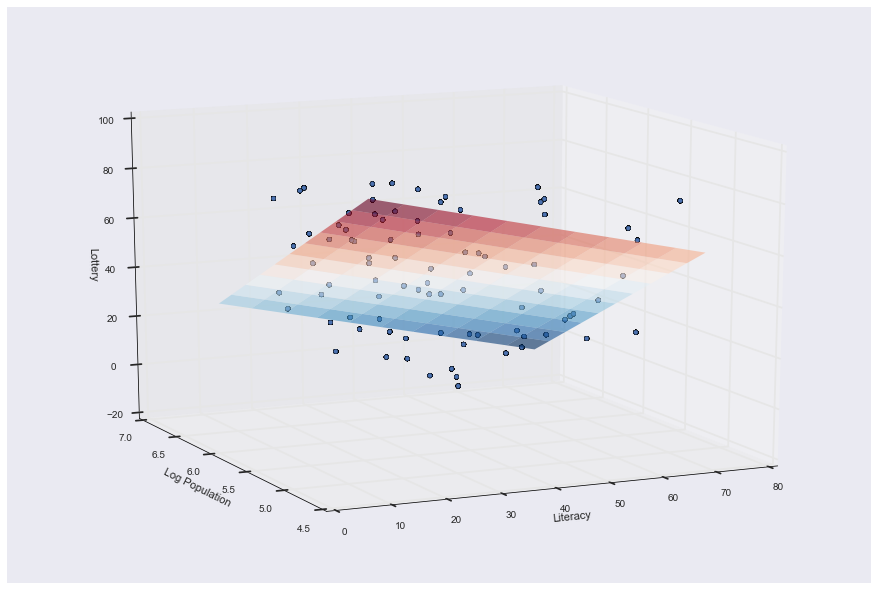

In [20]:
axis_plot(df)

## Categorical Data

I needed an example dataset that has some categories in it.

This arthritus dataset works.

In [21]:
dta = sm.datasets.get_rdataset("Arthritis", "vcd", cache=".cache")

The outcome variable is improvement in the patient's Arthritus condition.

In [22]:
dta.data.Improved.value_counts()

None      42
Marked    28
Some      14
Name: Improved, dtype: int64

I want to start with a binary variable, so we need to recode this.

In [23]:
df2 = dta.data

In [24]:
df2['B_Improved'] = df2['Improved'].map({'Some': True,
                                         'Marked': True,
                                         'None': False
                                        })

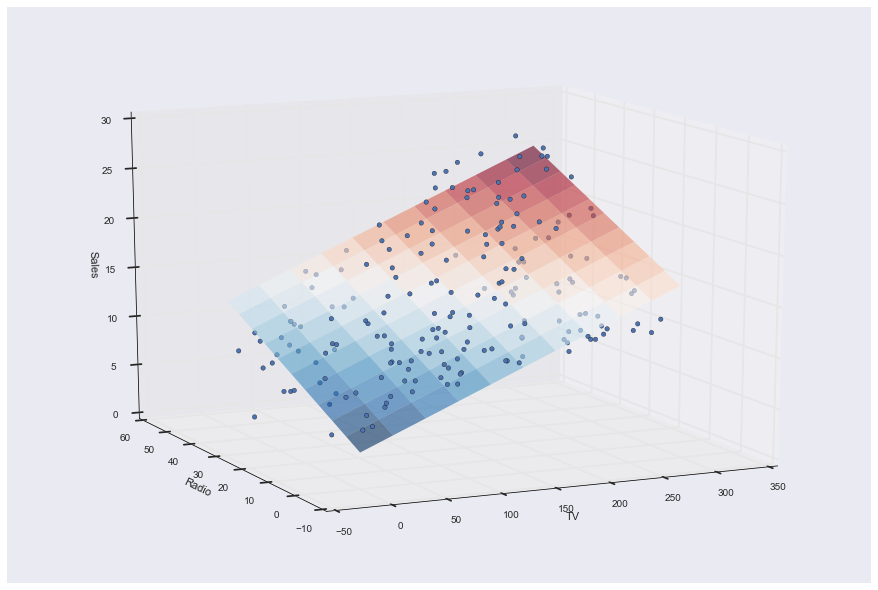

In [23]:
X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

In [25]:
df2.head()

,ID,Treatment,Sex,Age,Improved,B_Improved
0,57,Treated,Male,27,Some,True
1,46,Treated,Male,29,None,False
2,77,Treated,Male,30,None,False
3,17,Treated,Male,32,Marked,True
4,36,Treated,Male,46,Marked,True


In [26]:
X = patsy.dmatrix("Treatment + Sex + Age",
                  data=df2,
                  return_type='dataframe')
Y = df2.B_Improved

In [27]:
logit_model = sm.Logit(Y, X)

In [28]:
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.547993
         Iterations 6


In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             B_Improved   No. Observations:                   84
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                            3
Date:                Tue, 05 Apr 2016   Pseudo R-squ.:                  0.2094
Time:                        10:19:45   Log-Likelihood:                -46.031
converged:                       True   LL-Null:                       -58.224
                                        LLR p-value:                 2.075e-05
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -3.0155      1.168     -2.582      0.010        -5.304    -0.727
Treatment[T.Treated]     1.7598      0.536      3.280      0.001         0.708     2.811
Sex[T.Male]             -1.4878      0.595     -2.502      0.012        -2.654    -0.322
Age                      0.0487      0.021      2.359      0.018         0.008     0.089
========================================================================================
"""

    . logit B_Improved treat sex Age
    
    Iteration 0:   log likelihood = -58.224363  
    Iteration 1:   log likelihood = -46.120282  
    Iteration 2:   log likelihood = -46.031647  
    Iteration 3:   log likelihood = -46.031402  
    Iteration 4:   log likelihood = -46.031402  
    
    Logistic regression                               Number of obs   =         84
                                                      LR chi2(3)      =      24.39
                                                      Prob > chi2     =     0.0000
    Log likelihood = -46.031402                       Pseudo R2       =     0.2094
    
    ------------------------------------------------------------------------------
      B_Improved |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
           treat |   1.759804   .5364955     3.28   0.001     .7082924    2.811316
             sex |  -1.487831   .5947694    -2.50   0.012    -2.653558   -.3221046
             Age |   .0487465   .0206629     2.36   0.018     .0082479    .0892452
           _cons |  -3.287434   1.449412    -2.27   0.023     -6.12823    -.446638
    ------------------------------------------------------------------------------


In [30]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             B_Improved
Method:                          dydx
At:                           overall
========================================================================================
                          dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Treatment[T.Treated]     0.3238      0.074      4.403      0.000         0.180     0.468
Sex[T.Male]             -0.2738      0.095     -2.878      0.004        -0.460    -0.087
Age                      0.0090      0.003      2.689      0.007         0.002     0.016
========================================================================================
"""

    . margins, dydx(*)
    
    Average marginal effects                          Number of obs   =         84
    Model VCE    : OIM
    
    Expression   : Pr(B_Improved), predict()
    dy/dx w.r.t. : treat sex Age
    
    ------------------------------------------------------------------------------
                 |            Delta-method
                 |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
           treat |   .3238183   .0735499     4.40   0.000     .1796631    .4679735
             sex |   -.273773   .0951228    -2.88   0.004    -.4602103   -.0873358
             Age |   .0089698    .003336     2.69   0.007     .0024312    .0155083
    ------------------------------------------------------------------------------


### Multinomial Logit

In [31]:
Y = df2.Improved

In [32]:
mlogit_model = sm.MNLogit(Y, X)

In [33]:
results = mlogit_model.fit()

Optimization terminated successfully.
         Current function value: 0.850209
         Iterations 6


In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               Improved   No. Observations:                   84
Model:                        MNLogit   Df Residuals:                       76
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 Apr 2016   Pseudo R-squ.:                  0.1594
Time:                        10:19:45   Log-Likelihood:                -71.418
converged:                       True   LL-Null:                       -84.958
                                        LLR p-value:                 0.0001398
========================================================================================
       Improved=None       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                3.6465      1.334      2.733      0.006         1.031     6.262
Treatment[T.Treated]    -2.1447      0.609     -3.524      0.000        -3.338    -0.952
Sex[T.Male]              1.3900      0.656      2.118      0.034         0.104     2.677
Age                     -0.0475      0.023     -2.054      0.040        -0.093    -0.002
----------------------------------------------------------------------------------------
       Improved=Some       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -0.1695      1.800     -0.094      0.925        -3.697     3.358
Treatment[T.Treated]    -1.0687      0.698     -1.530      0.126        -2.438     0.300
Sex[T.Male]             -0.3026      0.908     -0.333      0.739        -2.082     1.477
Age                      0.0036      0.031      0.117      0.907        -0.056     0.063
========================================================================================
"""

    . mlogit improve treat sex Age

    Iteration 0:   log likelihood = -84.957958  
    Iteration 1:   log likelihood = -71.577377  
    Iteration 2:   log likelihood = -71.418045  
    Iteration 3:   log likelihood = -71.417555  
    Iteration 4:   log likelihood = -71.417555  

    Multinomial logistic regression                   Number of obs   =         84
                                                      LR chi2(6)      =      27.08
                                                      Prob > chi2     =     0.0001
    Log likelihood = -71.417555                       Pseudo R2       =     0.1594

    ------------------------------------------------------------------------------
         improve |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
    Marked       |
           treat |   2.144733   .6086598     3.52   0.000     .9517818    3.337684
             sex |  -1.390033   .6563779    -2.12   0.034     -2.67651   -.1035561
             Age |    .047497   .0231275     2.05   0.040     .0021678    .0928261
           _cons |  -4.401247   1.678671    -2.62   0.009    -7.691383   -1.111111
    -------------+----------------------------------------------------------------
    None         |  (base outcome)
    -------------+----------------------------------------------------------------
    Some         |
           treat |    1.07607   .6902589     1.56   0.119    -.2768126    2.428953
             sex |  -1.692597   .8710234    -1.94   0.052    -3.399771    .0145777
             Age |   .0510761   .0288193     1.77   0.076    -.0054088     .107561
           _cons |  -3.199487   2.012402    -1.59   0.112    -7.143722    .7447486
    ------------------------------------------------------------------------------


In [35]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:               Improved
Method:                          dydx
At:                           overall
========================================================================================
     Improved=Marked      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Treatment[T.Treated]     0.3151      0.073      4.306      0.000         0.172     0.459
Sex[T.Male]             -0.1406      0.106     -1.329      0.184        -0.348     0.067
Age                      0.0052      0.004      1.414      0.157        -0.002     0.012
----------------------------------------------------------------------------------------
       Improved=None      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Treatment[T.Treated]    -0.3210      0.074     -4.351      0.000        -0.466    -0.176
Sex[T.Male]              0.2767      0.096      2.876      0.004         0.088     0.465
Age                     -0.0090      0.003     -2.696      0.007        -0.016    -0.002
----------------------------------------------------------------------------------------
       Improved=Some      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Treatment[T.Treated]     0.0059      0.070      0.084      0.933        -0.131     0.142
Sex[T.Male]             -0.1360      0.106     -1.288      0.198        -0.343     0.071
Age                      0.0038      0.003      1.081      0.280        -0.003     0.011
========================================================================================
"""

    . margins, dydx(*)

    Average marginal effects                          Number of obs   =         84
    Model VCE    : OIM

    Expression   : Pr(improve==Marked), predict()
    dy/dx w.r.t. : treat sex Age

    ------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
       treat |   .3151456   .0731874     4.31   0.000     .1717009    .4585903
         sex |  -.1406108   .1058278    -1.33   0.184    -.3480295    .0668079
         Age |   .0052369   .0037041     1.41   0.157    -.0020229    .0124967
    ------------------------------------------------------------------------------


### Categorical Variables

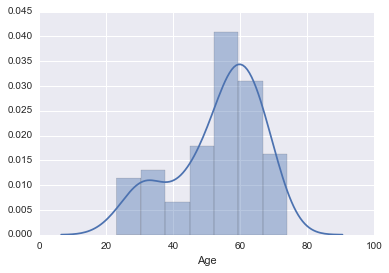

In [36]:
sns.distplot(df2['Age'])

In [37]:
df2['age_cat'] = pd.cut(df2['Age'], 4)
df2['age_cat'].value_counts()

(48.5, 61.25]      33
(61.25, 74]        26
(35.75, 48.5]      13
(22.949, 35.75]    12
dtype: int64

In [38]:
X = patsy.dmatrix("Treatment + Sex + age_cat",
                  data=df2,
                  return_type='dataframe')
Y = df2.B_Improved

In [39]:
logit_model = sm.Logit(Y, X)

In [40]:
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.548688
         Iterations 6


In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             B_Improved   No. Observations:                   84
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Apr 2016   Pseudo R-squ.:                  0.2084
Time:                        10:19:46   Log-Likelihood:                -46.090
converged:                       True   LL-Null:                       -58.224
                                        LLR p-value:                 0.0001927
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -1.1396      0.716     -1.592      0.111        -2.542     0.263
Treatment[T.Treated]         1.8908      0.553      3.418      0.001         0.807     2.975
Sex[T.Male]                 -1.6145      0.609     -2.653      0.008        -2.807    -0.422
age_cat[T.(35.75, 48.5]]    -0.4551      0.956     -0.476      0.634        -2.329     1.419
age_cat[T.(48.5, 61.25]]     1.0150      0.772      1.315      0.188        -0.498     2.528
age_cat[T.(61.25, 74]]       1.1948      0.792      1.508      0.132        -0.358     2.748
============================================================================================
"""

In [42]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             B_Improved
Method:                          dydx
At:                           overall
============================================================================================
                              dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Treatment[T.Treated]         0.3495      0.074      4.734      0.000         0.205     0.494
Sex[T.Male]                 -0.2984      0.096     -3.121      0.002        -0.486    -0.111
age_cat[T.(35.75, 48.5]]    -0.0841      0.176     -0.477      0.633        -0.430     0.261
age_cat[T.(48.5, 61.25]]     0.1876      0.137      1.369      0.171        -0.081     0.456
age_cat[T.(61.25, 74]]       0.2209      0.139      1.591      0.112        -0.051     0.493
============================================================================================
"""